<a href="https://colab.research.google.com/github/peterworcester/python/blob/master/scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grid Search vs. Randomized Search

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy as sp
%matplotlib inline

In [8]:
# uploading a file to google colab
from google.colab import files
uploaded = files.upload()

Saving phones.csv to phones.csv


In [9]:
data = pd.read_csv("phones.csv", encoding = 'latin-1')
data.sample(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
822,839,0,2.0,1,0,0,14,0.4,175,7,3,564,1391,3835,15,8,11,1,0,0,3
1636,1561,0,0.5,1,10,1,4,0.5,134,2,13,885,1811,1783,13,12,10,1,1,0,2
1005,1270,1,2.3,0,0,0,58,0.5,104,5,1,1512,1716,3299,13,4,16,0,0,1,3
1298,1089,0,1.4,1,10,0,2,0.1,153,7,20,211,1409,2620,7,5,13,1,0,0,2
480,1417,1,2.7,0,2,1,56,0.9,114,6,4,494,1649,590,11,3,6,1,0,1,0


In [10]:
X = data.drop('price_range',axis=1)
y = data.price_range

X.shape, y.shape

((2000, 20), (2000,))

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC

def tune(X, y, search_type, n_iter):
  scores = []
  params = []
  for i in range (len(n_iter)):
    scaler = StandardScaler()
    clf = SVC()
    pipe = Pipeline(steps=[('scaler',scaler),('svc',clf)])
    if search_type == 'grid':
      param_grid = dict(svc__C = np.logspace(-2,5,np.round(n_iter[i]**0.5)),svc__gamma = np.logspace(-5,1,np.round(n_iter[i]**0.5)))
      gridsearch = GridSearchCV(pipe,param_grid = param_grid, cv = 3)
      gridsearch.fit(X,y)
      scores.append(gridsearch.best_score_)
      params.append(gridsearch.best_params_)
    elif search_type == 'random':
      param_distributions = {'svc__C':sp.stats.expon(scale=10),'svc__gamma': sp.stats.expon(scale=0.1)}
      randsearch = RandomizedSearchCV(pipe,param_distributions = param_distributions, n_iter=n_iter[i],cv=3,random_state=333)
      randsearch.fit(X,y)
      scores.append(randsearch.best_score_)
      params.append(randsearch.best_params_)
      print(search_type,"with",str(n_iter[i]),"iterations completed")
  return scores, params    

In [13]:
n_iterations = [9,25,64,100,169]

scores_grid,params_grid = tune(X,y,'grid',n_iterations)
scores_random,params_random = tune(X,y,'random',n_iterations)

random with 9 iterations completed
random with 25 iterations completed
random with 64 iterations completed
random with 100 iterations completed
random with 169 iterations completed


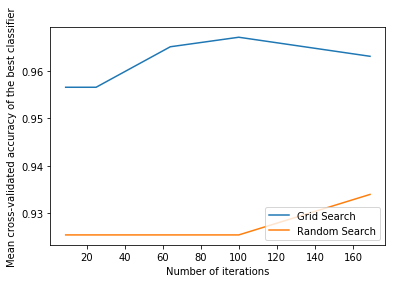

In [14]:
plt.plot(n_iterations,scores_grid)
plt.plot(n_iterations,scores_random)

plt.legend(['Grid Search','Random Search'], loc='lower right')
plt.xlabel('Number of iterations')
plt.ylabel('Mean cross-validated accuracy of the best classifier')
plt.show()

In [0]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=2000,
                                   n_features=20)

In [0]:
def tune(X , y, search_type, n_iter):
    scores = []
    params = []
    for i in range(len(n_iter)):
        if search_type == 'grid':
            param_grid = {'C' : np.logspace(-2, 5, np.round(n_iter[i]**0.5)), 'gamma' : np.logspace(-5, 1, np.round(n_iter[i]**0.5))}
            gridsearch = GridSearchCV(SVC(), param_grid = param_grid, cv = 3)
            gridsearch.fit(X, y)
            scores.append(gridsearch.best_score_)
            params.append(gridsearch.best_params_)
        elif search_type == 'random':
            param_distributions = {'C': sp.stats.expon(scale=10), 
            'gamma': sp.stats.expon(scale=0.1)}
            randsearch = RandomizedSearchCV(SVC(), param_distributions = param_distributions, n_iter= n_iter[i], cv = 3, random_state = 333)
            randsearch.fit(X, y)
            scores.append(randsearch.best_score_)
            params.append(randsearch.best_params_)
        
        print(search_type, "with", str(n_iter[i]), "iterations completed")
    
    return scores, params

In [39]:
n_iterations = [9, 25, 64, 100, 169]

scores_grid, params_grid = tune(X, y, 'grid', n_iterations)
scores_random, params_random = tune(X, y, 'random', n_iterations)

grid with 9 iterations completed
grid with 25 iterations completed
grid with 64 iterations completed
grid with 100 iterations completed
grid with 169 iterations completed
random with 9 iterations completed
random with 25 iterations completed
random with 64 iterations completed
random with 100 iterations completed
random with 169 iterations completed


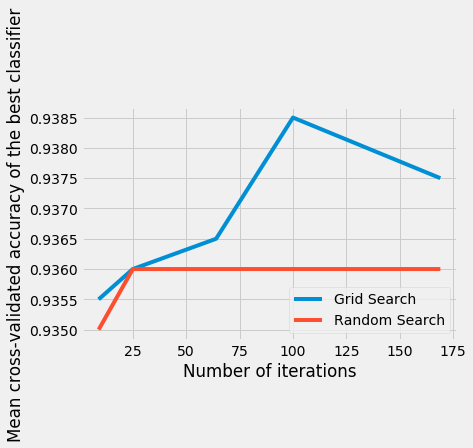

In [40]:
plt.plot(n_iterations, scores_grid)
plt.plot(n_iterations, scores_random)

plt.legend(['Grid Search', 'Random Search'], loc='lower right')
plt.xlabel('Number of iterations')
plt.ylabel('Mean cross-validated accuracy of the best classifier')
plt.show()